<a href="https://colab.research.google.com/github/NimitBajaj/ML_Evaluation_102203905/blob/main/NimitBajaj_102203905.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.3 MB/s eta 0:00:00
   ━━━

In [1]:
from pycaret.regression import *
import pandas as pd


In [5]:
data = pd.read_csv("/content/Fuel_cell_performance_data-Full (2).csv")

In [6]:
target_column = 'Target5'

In [7]:
data = data.drop(columns=['Target1', 'Target2', 'Target3', 'Target4'])

In [8]:
print("Dataset Columns:", data.columns)
print("\nFirst few rows of the dataset:")
print(data.head())

Dataset Columns: Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'Target5'],
      dtype='object')

First few rows of the dataset:
     F1    F2    F3     F4      F5    F6     F7     F8   F9   F10      F11  \
0  52.9  1.33  49.1  37.13  129.43  35.0  0.281  112.7  207  0.55   98.971   
1  87.6  2.12  48.8  42.10  171.07  37.6  0.153  157.4  188  0.86  101.179   
2  73.3  2.72  93.8  20.11  163.69  44.3  0.367  348.7  270  1.87   98.919   
3  65.6  2.58  48.1  35.11   63.37  32.5  0.279  321.2  322  1.75  101.560   
4  39.6  2.58  49.3  32.93   63.40  47.0  0.149  205.6  203  1.55   98.148   

    F12   F13   F14   F15  Target5  
0  2.87  1362  15.9   429    33.29  
1  2.34  5130  26.1  1819    34.50  
2  2.13  7811  16.7  1763   129.28  
3  2.91  1641  32.1   203   186.65  
4  1.93  7648  27.5   276    52.32  


In [9]:
reg_setup = setup(
    data=data,
    target=target_column,
    session_id=42,
    train_size=0.7,
    normalize=True,
    transformation=True,
)

,Description,Value
0,Session id,42
1,Target,Target5
2,Target type,Regression
3,Original data shape,"(1000, 16)"
4,Transformed data shape,"(1000, 16)"
5,Transformed train set shape,"(700, 16)"
6,Transformed test set shape,"(300, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [10]:
best_model = compare_models()


print("\nBest Model:")
print(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,14.7606,433.2456,20.7468,0.7714,0.3544,0.3480,0.3710
gbr,Gradient Boosting Regressor,15.0967,443.6484,21.0062,0.7631,0.4033,0.3506,0.4990
rf,Random Forest Regressor,15.6734,478.7143,21.8321,0.7465,0.3726,0.3692,0.9470
lightgbm,Light Gradient Boosting Machine,15.3891,479.7816,21.8207,0.7446,0.3749,0.3418,1.0400
xgboost,Extreme Gradient Boosting,15.8033,486.7850,21.9324,0.7393,0.3823,0.3691,0.5580
llar,Lasso Least Angle Regression,16.9828,528.5357,22.8223,0.7254,0.4886,0.5211,0.0690
lasso,Lasso Regression,16.9828,528.5357,22.8223,0.7254,0.4886,0.5211,0.0670
br,Bayesian Ridge,17.3039,530.4271,22.8612,0.7240,0.5179,0.5588,0.0660
ridge,Ridge Regression,17.3356,530.4505,22.8641,0.7239,0.5222,0.5642,0.0650
lar,Least Angle Regression,17.3431,530.4815,22.8653,0.7238,0.5230,0.5654,0.0700


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model:
ExtraTreesRegressor(n_jobs=-1, random_state=42)


In [11]:
final_model = finalize_model(best_model)


save_model(final_model, 'best_fuel_cell_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['F1', 'F2', 'F3', 'F4', 'F5', 'F6',
                                              'F7', 'F8', 'F9', 'F10', 'F11',
                                              'F12', 'F13', 'F14', 'F15'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('actual_estimator',
                  ExtraTreesRegressor(n_jobs=-1, random_state=42))]),
 'best_fuel_cell_model.pkl')

In [12]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
predictions = predict_model(final_model)


print("\nFirst few predictions on the test set:")
print(predictions.head())

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.2125,3.5154,1.8749,0.9983,0.0389,0.0278



First few predictions on the test set:
            F1    F2         F3         F4          F5         F6     F7  \
521  53.299999  2.96  39.799999  29.850000  132.610001  39.200001  0.168   
737  79.400002  1.34  67.699997  38.540001   95.220001  31.799999  0.100   
740  57.400002  2.64  57.200001  47.099998  153.100006  46.599998  0.156   
660  52.299999  2.27  64.099998  29.330000  123.169998  30.000000  0.266   
411  87.199997  1.24  40.599998  15.390000   40.860001  32.099998  0.202   

             F8   F9   F10         F11   F12   F13        F14   F15  \
521  250.199997  148  0.99   98.070000  2.33  5382  23.500000  1706   
737  163.300003  198  0.99  102.834999  2.15  7648  26.299999  1675   
740  268.100006  294  1.73  101.441002  1.90   852  25.799999  1203   
660  108.099998  385  1.54  100.304001  2.82  8513  18.400000  1641   
411  232.600006  302  1.54   99.363998  2.82  5708  23.100000   428   

        Target5  prediction_label  
521   49.480000         50.343100  
737 

In [14]:
unseen_data = data.sample(5)
new_predictions = predict_model(final_model, data=unseen_data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


In [15]:
print("\nPredictions on unseen data:")
print(new_predictions)


Predictions on unseen data:
            F1    F2         F3         F4          F5         F6     F7  \
521  53.299999  2.96  39.799999  29.850000  132.610001  39.200001  0.168   
737  79.400002  1.34  67.699997  38.540001   95.220001  31.799999  0.100   
740  57.400002  2.64  57.200001  47.099998  153.100006  46.599998  0.156   
660  52.299999  2.27  64.099998  29.330000  123.169998  30.000000  0.266   
411  87.199997  1.24  40.599998  15.390000   40.860001  32.099998  0.202   

             F8   F9   F10         F11   F12   F13        F14   F15  \
521  250.199997  148  0.99   98.070000  2.33  5382  23.500000  1706   
737  163.300003  198  0.99  102.834999  2.15  7648  26.299999  1675   
740  268.100006  294  1.73  101.441002  1.90   852  25.799999  1203   
660  108.099998  385  1.54  100.304001  2.82  8513  18.400000  1641   
411  232.600006  302  1.54   99.363998  2.82  5708  23.100000   428   

        Target5  prediction_label  
521   49.480000         49.480000  
737   54.299999

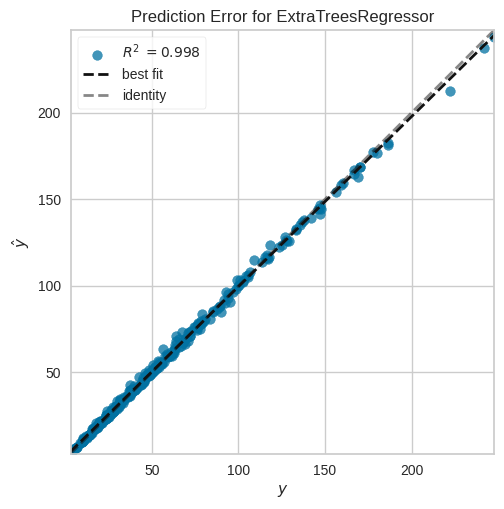

In [16]:
plot_model(final_model, plot='error')